In [1]:
import pandas as pd
path='/kaggle/input/wholesale-customers/Wholesale customers data.csv'
data=pd.read_csv(path)

In [2]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
data.columns


Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

<Axes: >

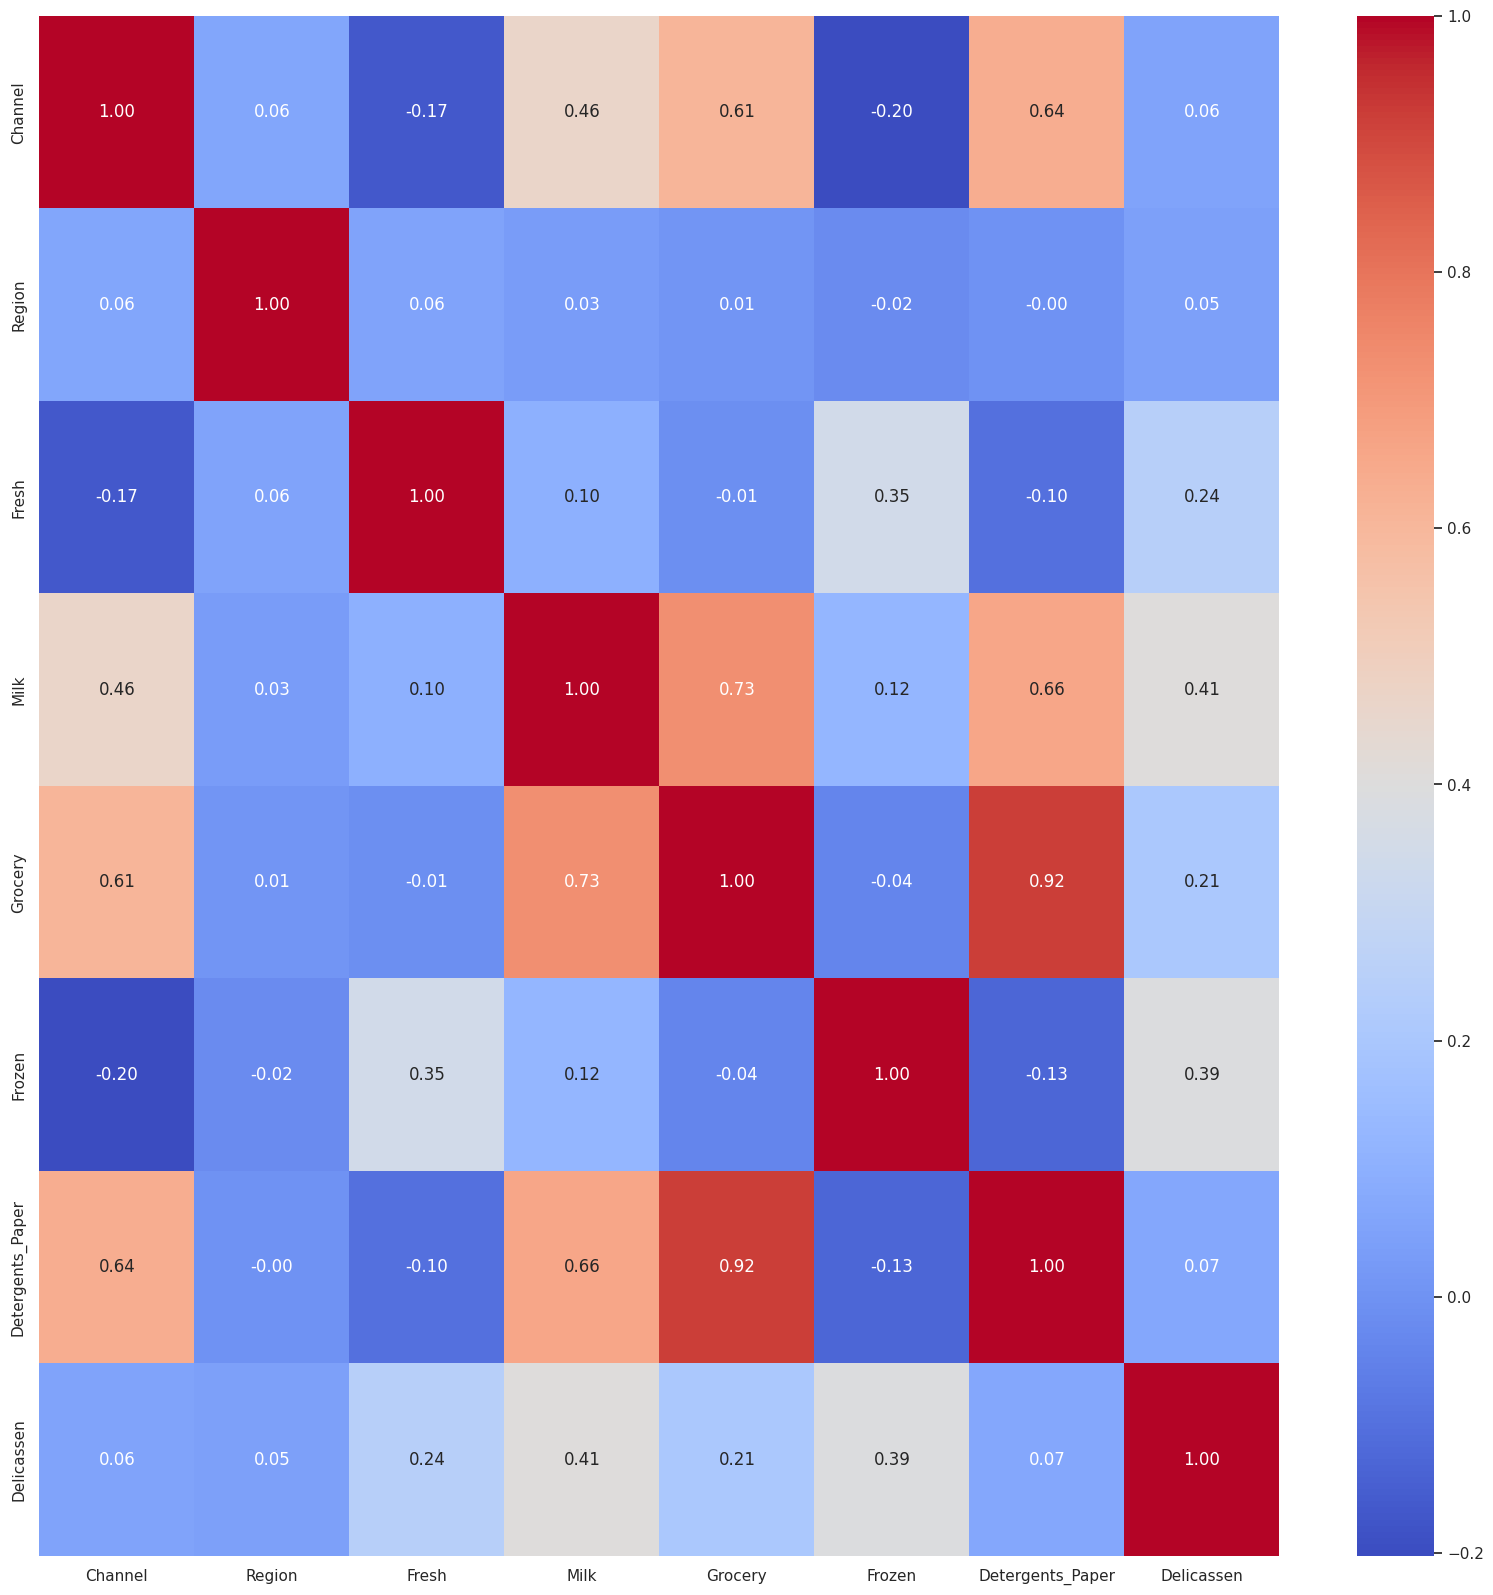

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='coolwarm')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

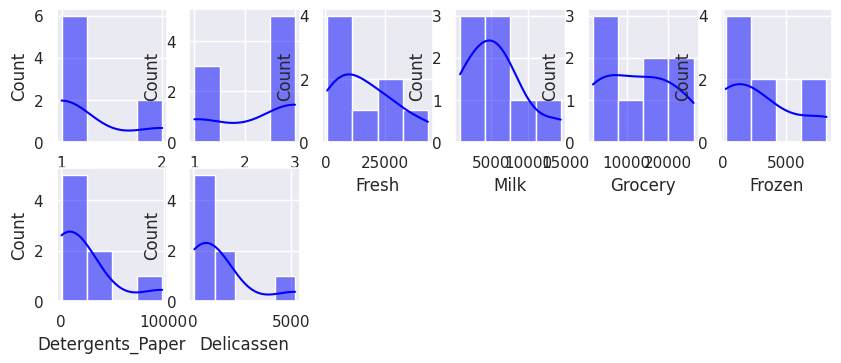

In [5]:
sns.set(rc={'figure.figsize':(10,10)})
for i, column in enumerate(list(data.columns), 1):
    plt.subplot(5,6,i)
    p=sns.histplot(x=column,data=data.sample(8),stat='count',kde=True,color='blue')

In [6]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization
data_scaled = scaler.fit_transform(data)

# Convert back to DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

print(data_scaled.head())


    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2  1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3 -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4  1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   

   Detergents_Paper  Delicassen  
0         -0.043569   -0.066339  
1          0.086407    0.089151  
2          0.133232    2.243293  
3         -0.498588    0.093411  
4         -0.231918    1.299347  


Kmeans clustering

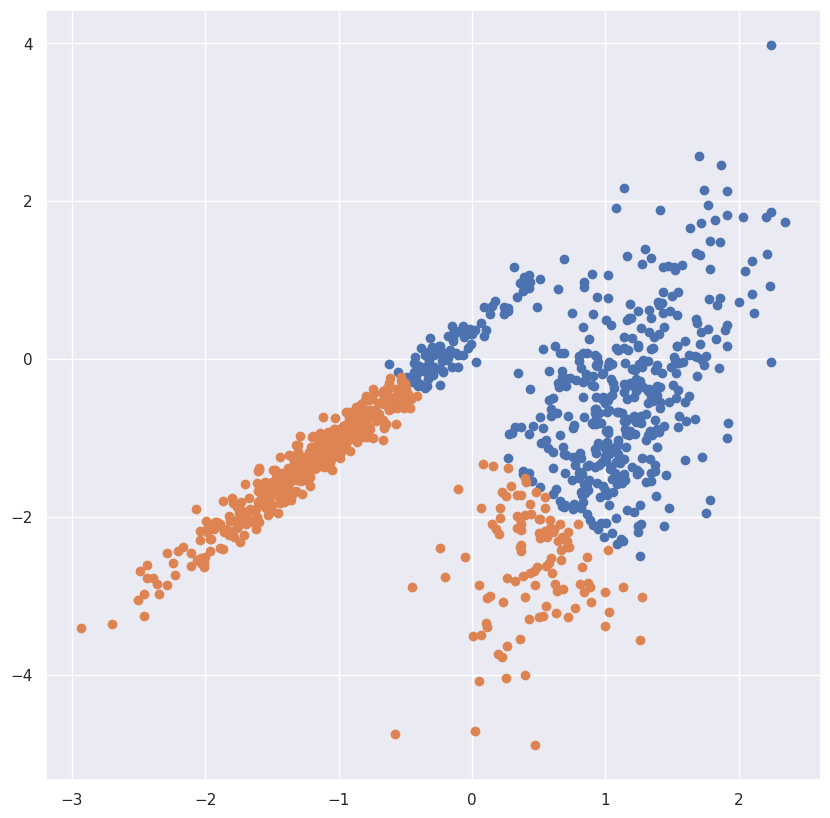

In [7]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans

# initialize the data set we'll work with
training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# define the model
kmeans_model = KMeans(n_clusters=2 ,random_state=42, n_init=10)

# assign each data point to a cluster
kmeans_result = kmeans_model.fit_predict(training_data)

# get all of the unique clusters
kmeans_clusters = unique(kmeans_result)

# plot the Kmeans clusters
for kmeans_clusters in kmeans_clusters:
    # get data points that fall in this cluster
    index = where(kmeans_result == kmeans_clusters)
    # make the plot
    plt.scatter(training_data[index, 0], training_data[index, 1])

# show the Kmeans plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

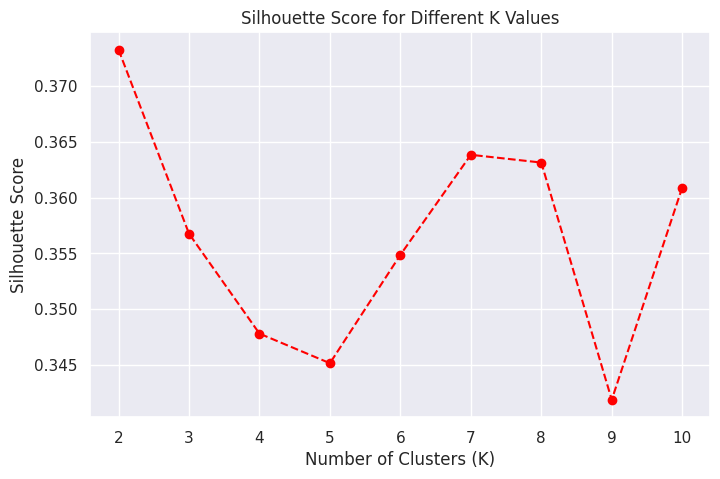

In [8]:
#Plot Silhouette
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different K values
silhouette_scores = []
for k in range(2, 11):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, cluster_labels))

# Plot Silhouette Scores
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='red')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K Values')
plt.show()

DBSCAN

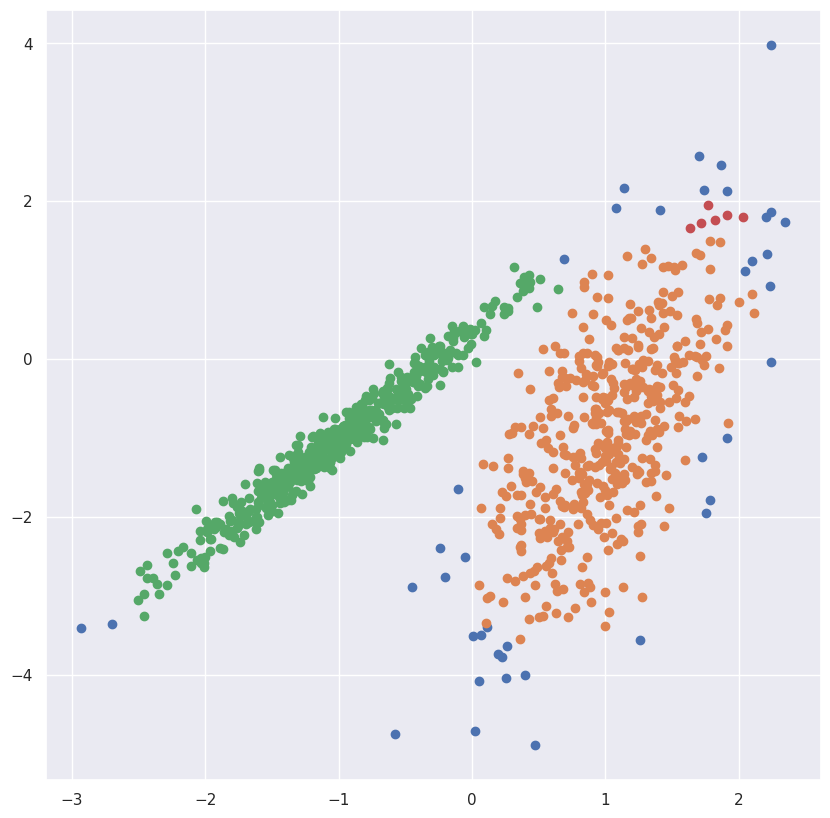

In [9]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN

# initialize the data set we'll work with
training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# define the model
dbscan_model = DBSCAN(eps=0.3, min_samples=8)

# train the model
dbscan_model.fit(training_data)

# assign each data point to a cluster
dbscan_result = dbscan_model.labels_

# get all of the unique clusters
dbscan_clusters = unique(dbscan_result)

# plot the DBSCAN clusters
for dbscan_clusters in dbscan_clusters:
    # get data points that fall in this cluster
    index = where(dbscan_result == dbscan_clusters)

    # make the plot
    pyplot.scatter(training_data[index, 0], training_data[index, 1])

# show the DBSCAN plot
pyplot.show()

Silhouette score for DBSCAN

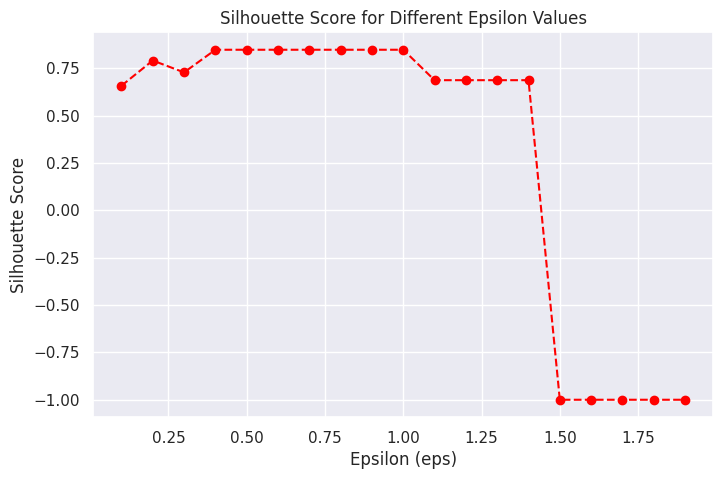

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Standardize the data
X_scaled = StandardScaler().fit_transform(X)

# Define different epsilon values to test
eps_values = np.arange(0.1, 2.0, 0.1)

# Store silhouette scores
silhouette_scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    cluster_labels = dbscan.fit_predict(X_scaled)
    
    # Only compute silhouette score if more than 1 cluster is found
    if len(set(cluster_labels)) > 1:
        silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))
    else:
        silhouette_scores.append(-1)  # Invalid silhouette score for single cluster

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(eps_values, silhouette_scores, marker='o', linestyle='--', color='red')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Epsilon Values')
plt.show()


Gaussian

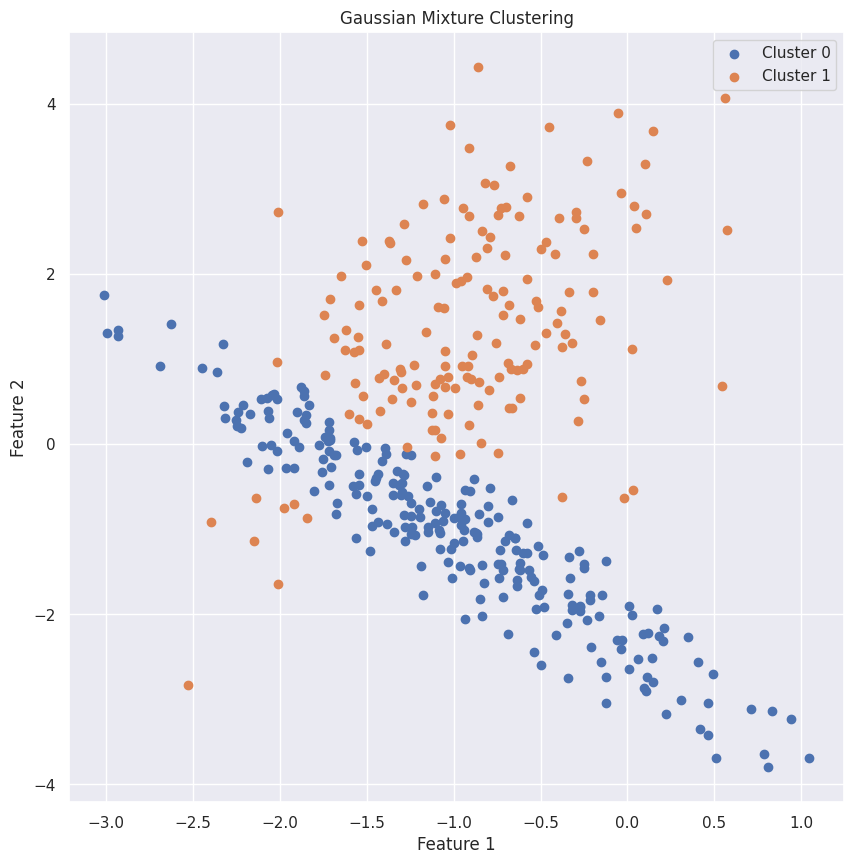

In [11]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Initialize the dataset
training_data, _ = make_classification(
    n_samples=400,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# Define the Gaussian Mixture model
gaussian_model = GaussianMixture(n_components=2)

# Train the model
gaussian_model.fit(training_data)

# Assign each data point to a cluster
gaussian_result = gaussian_model.predict(training_data)

# Get all of the unique clusters
gaussian_clusters = np.unique(gaussian_result)

# Plot the Gaussian Mixture clusters
for gaussian_cluster in gaussian_clusters:
    # Get data points that belong to this cluster
    indices = np.where(gaussian_result == gaussian_cluster)
    # Make the scatter plot for the first two features
    plt.scatter(training_data[indices, 0], training_data[indices, 1], label=f'Cluster {gaussian_cluster}')

# Show the Gaussian Mixture plot with legend
plt.title("Gaussian Mixture Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

BIRCH

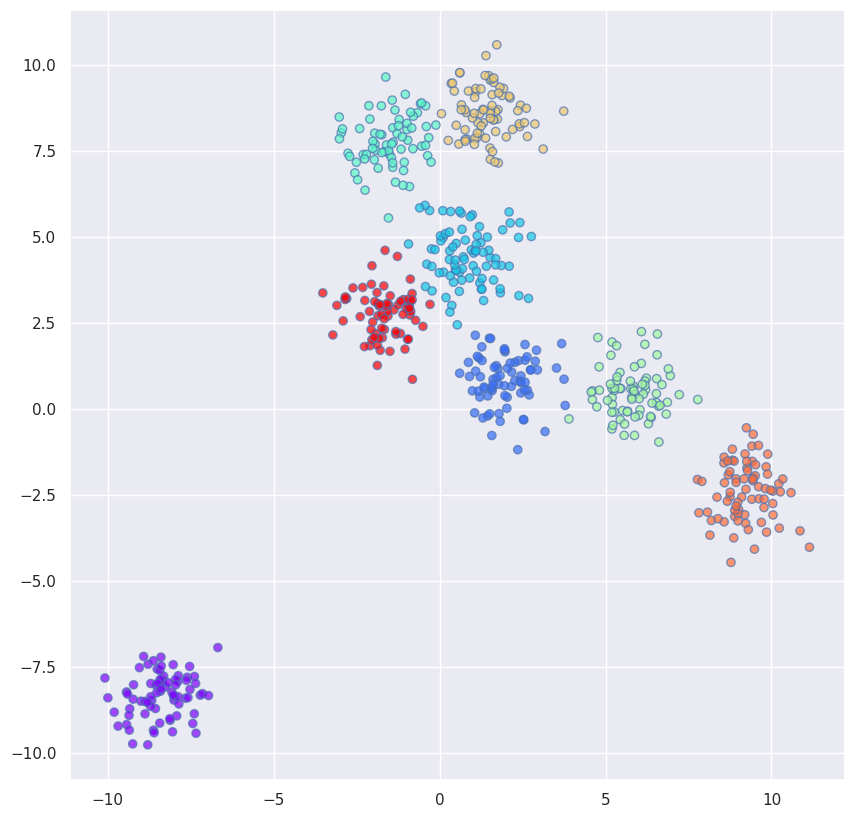

In [12]:

# Import required libraries and modules
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch
 
# Generating 600 samples using make_blobs
dataset, clusters = make_blobs(n_samples = 600, centers = 8, cluster_std = 0.75, random_state = 0)
 
# Creating the BIRCH clustering model
model = Birch(branching_factor = 50, n_clusters = None, threshold = 1.5)
 
# Fit the data (Training)
model.fit(dataset)
 
# Predict the same data
pred = model.predict(dataset)
 
# Creating a scatter plot
plt.scatter(dataset[:, 0], dataset[:, 1], c = pred, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.show()

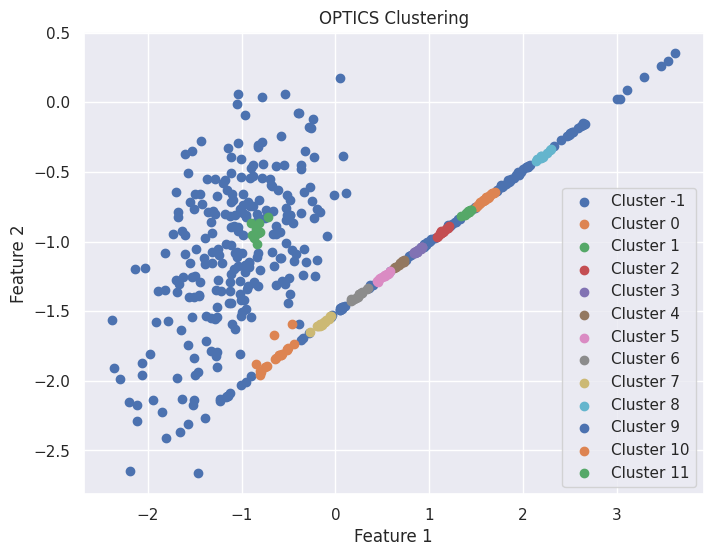

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import OPTICS

# Initialize the dataset
training_data, _ = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# Define the model
optics_model = OPTICS(eps=0.75, min_samples=10)

# Fit and predict
optics_result = optics_model.fit_predict(training_data)

# Get unique clusters
optics_clusters = np.unique(optics_result)

# Plot the OPTICS clusters
plt.figure(figsize=(8, 6))

for optics_cluster in optics_clusters:
    index = np.where(optics_result == optics_cluster)
    plt.scatter(training_data[index, 0], training_data[index, 1], label=f'Cluster {optics_cluster}')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("OPTICS Clustering")
plt.legend()
plt.show()


Agglomeretive hierachy

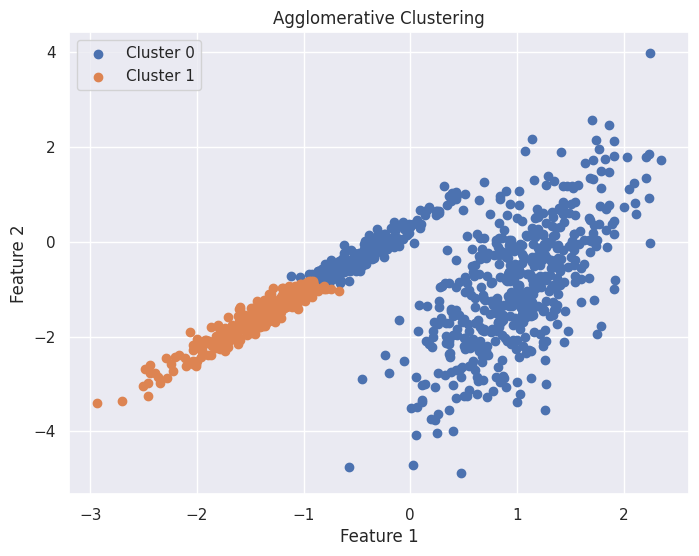

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering

# Initialize dataset
training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# Define the model
agglomerative_model = AgglomerativeClustering(n_clusters=2)

# Assign each data point to a cluster
agglomerative_result = agglomerative_model.fit_predict(training_data)

# Get all unique clusters
agglomerative_clusters = np.unique(agglomerative_result)

# Plot the clusters
plt.figure(figsize=(8, 6))
for agglomerative_cluster in agglomerative_clusters:
    index = np.where(agglomerative_result == agglomerative_cluster)  # Corrected line
    plt.scatter(training_data[index, 0], training_data[index, 1], label=f'Cluster {agglomerative_cluster}')

# Plot formatting
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Agglomerative Clustering")
plt.legend()
plt.show()


HDESCAN/DIANA

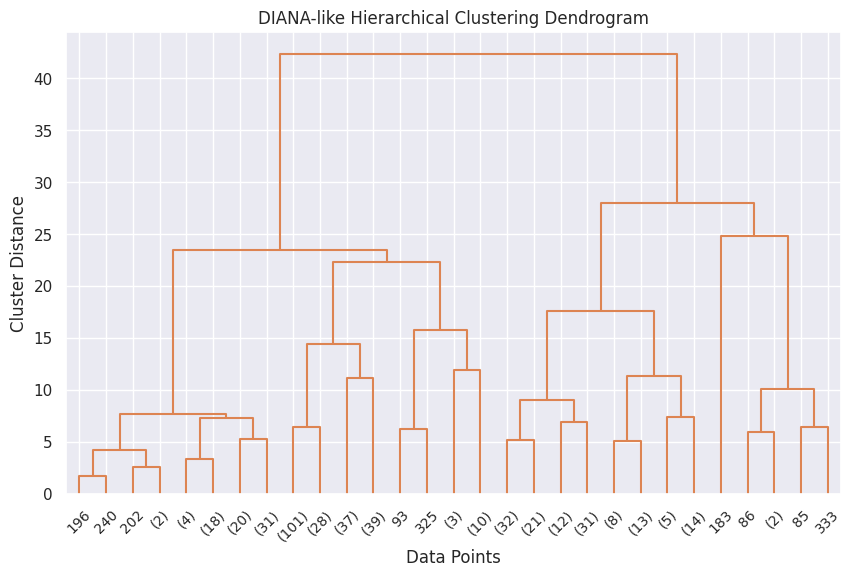

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering using 'ward' linkage (similar to DIANA)
linked = linkage(data_scaled, method='ward')  # Ward method minimizes variance

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=4, color_threshold=150)
plt.title("DIANA-like Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Cluster Distance")
plt.show()


Fuzzy Cluster Analysis

In [16]:
!pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.0 MB/s eta 0:00:00


Text(0.5, 1.0, 'Test data: 200 points x3 clusters.')

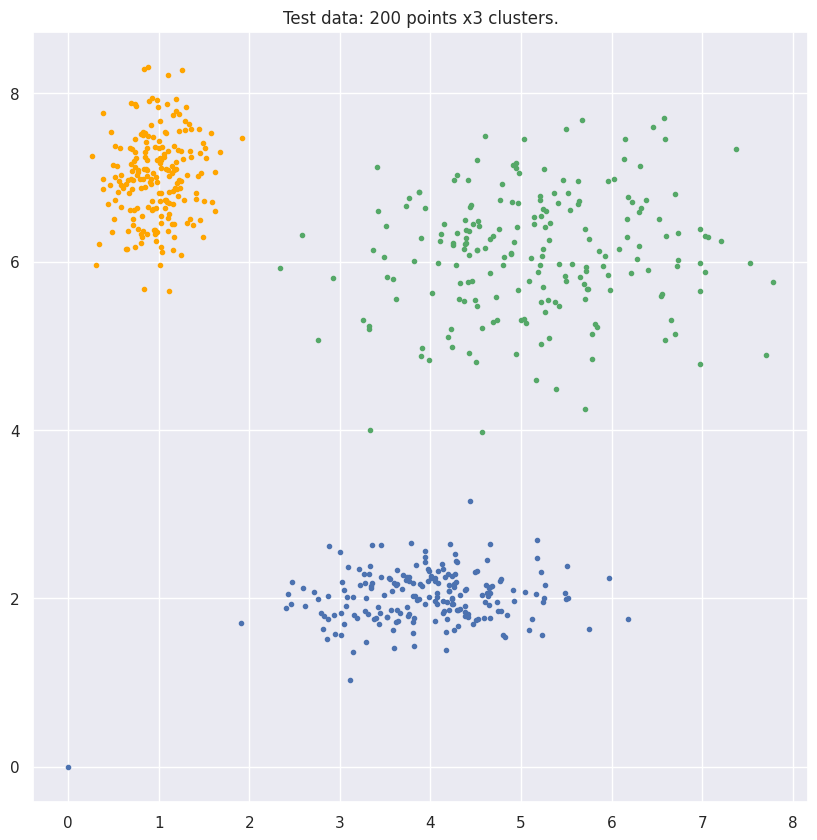

In [17]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')

STING (Statistical Information Grid-based Clustering)

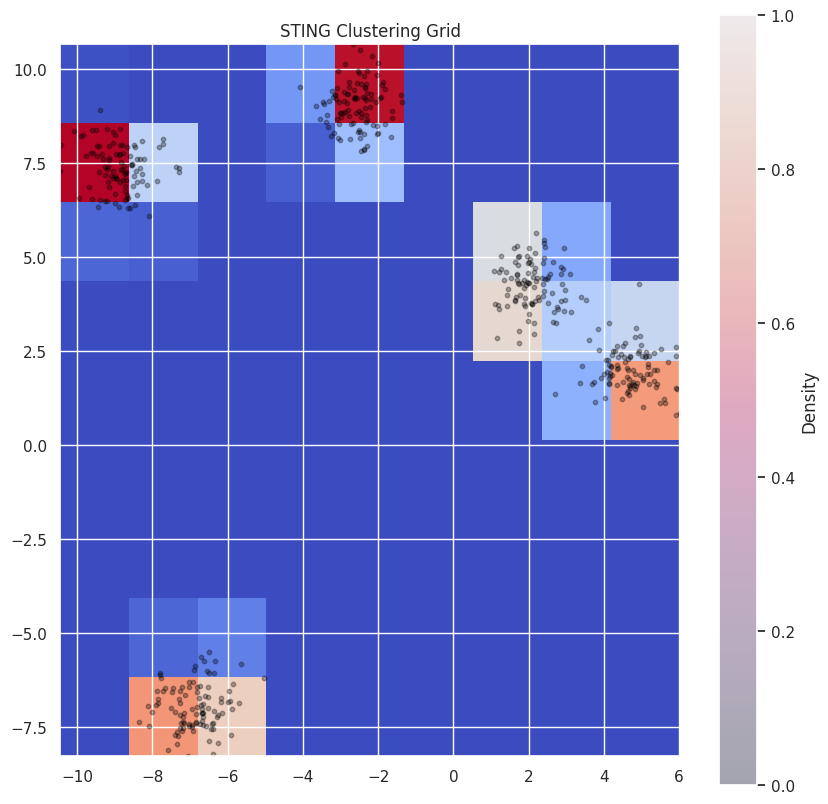

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate sample data
data, _ = make_blobs(n_samples=500, centers=5, cluster_std=0.6, random_state=42)

# Define grid size
x_min, x_max = data[:, 0].min(), data[:, 0].max()
y_min, y_max = data[:, 1].min(), data[:, 1].max()
grid_size = 10  # Number of divisions

x_bins = np.linspace(x_min, x_max, grid_size)
y_bins = np.linspace(y_min, y_max, grid_size)

# Count points in each grid cell
hist, x_edges, y_edges = np.histogram2d(data[:, 0], data[:, 1], bins=(x_bins, y_bins))

# Plot grid cells with different densities
plt.imshow(hist.T, origin="lower", cmap="coolwarm", extent=[x_min, x_max, y_min, y_max])
plt.scatter(data[:, 0], data[:, 1], alpha=0.3, color='black', s=10)
plt.colorbar(label='Density')
plt.title("STING Clustering Grid")
plt.show()


CLIQUE (Subspace Clustering)

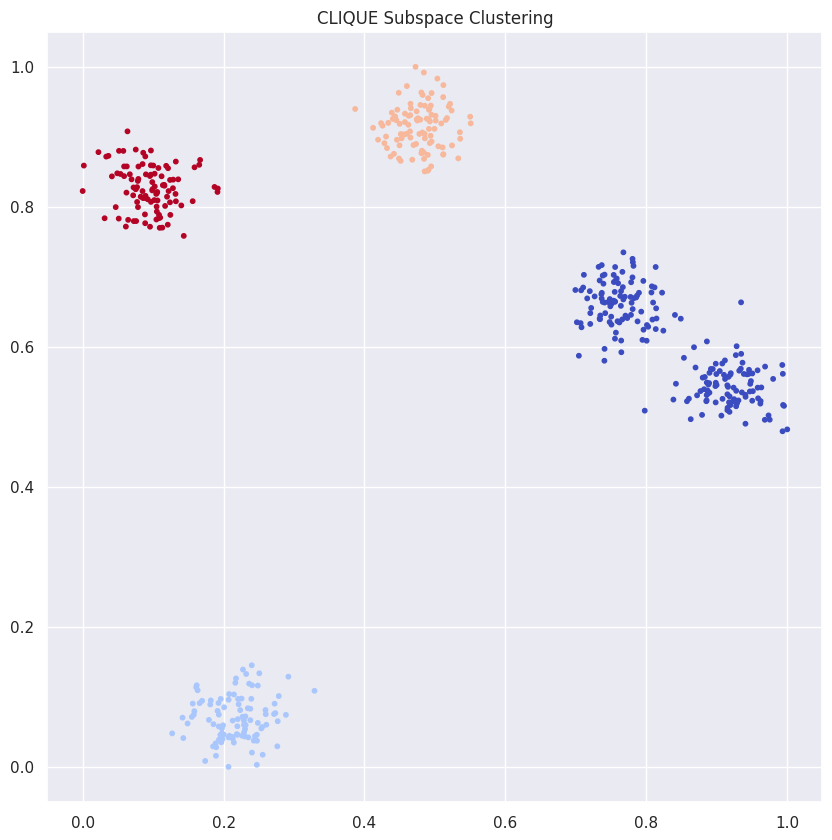

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

# Generate sample high-dimensional data
data, _ = make_blobs(n_samples=500, centers=5, cluster_std=0.6, random_state=42)

# Normalize data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Apply DBSCAN to cluster in subspaces
clique = DBSCAN(eps=0.1, min_samples=5, metric='euclidean')
labels = clique.fit_predict(data_scaled)

# Plot results
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='coolwarm', s=10)
plt.title("CLIQUE Subspace Clustering")
plt.show()


DENCLUE (Density-Based Clustering via Kernel Density Estimation)

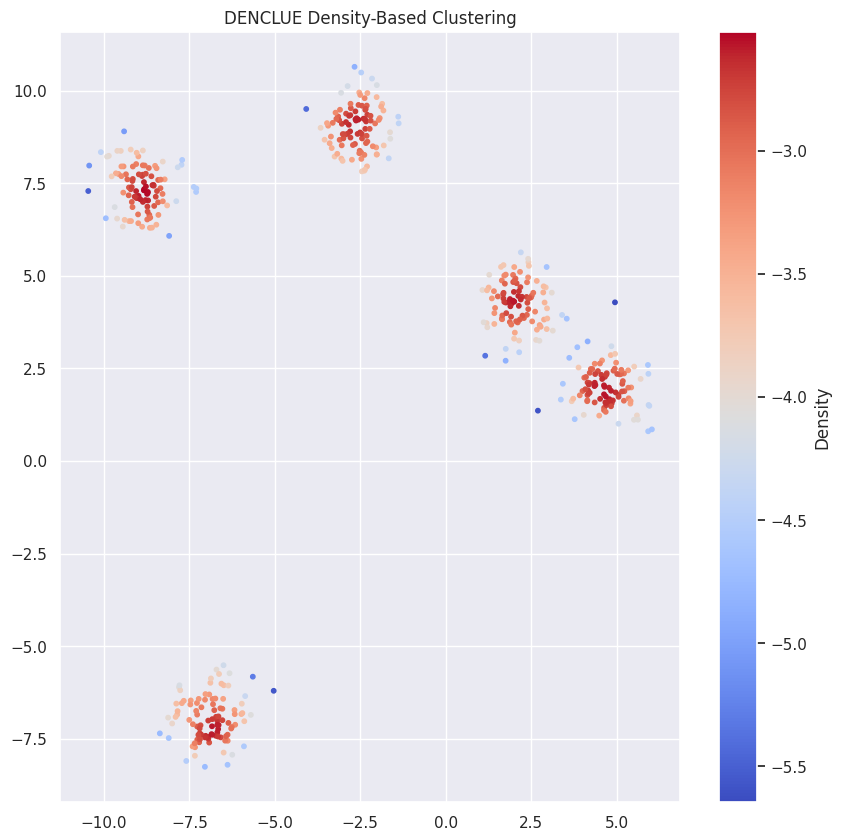

In [20]:
from sklearn.neighbors import KernelDensity

# Apply Kernel Density Estimation
kde = KernelDensity(kernel='gaussian', bandwidth=0.3).fit(data)
log_density = kde.score_samples(data)

# Plot density contours
plt.scatter(data[:, 0], data[:, 1], c=log_density, cmap='coolwarm', s=10)
plt.colorbar(label='Density')
plt.title("DENCLUE Density-Based Clustering")
plt.show()


WEAVE (WaveCluster - Wavelet Transform Clustering)

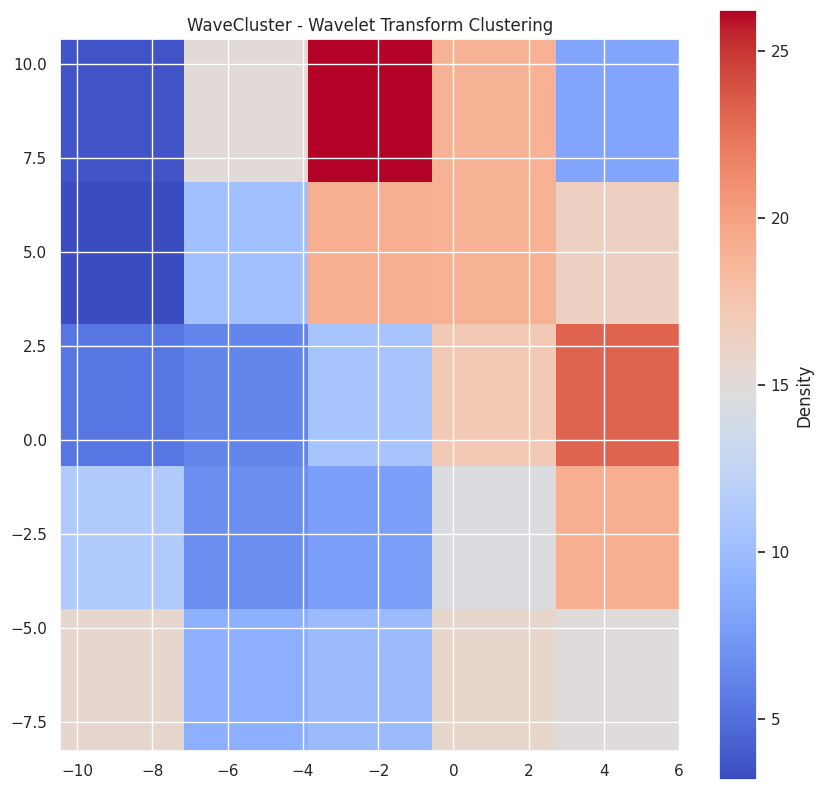

In [21]:
import pywt
from scipy.ndimage import gaussian_filter

# Apply wavelet transform
wavelet_coeffs = pywt.wavedec2(hist, 'haar', level=1)
filtered = gaussian_filter(wavelet_coeffs[0], sigma=1)

# Show transformed density
plt.imshow(filtered, cmap="coolwarm", origin="lower", extent=[x_min, x_max, y_min, y_max])
plt.title("WaveCluster - Wavelet Transform Clustering")
plt.colorbar(label="Density")
plt.show()


In [22]:
from sklearn.cluster import KMeans, DBSCAN, Birch, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score
import skfuzzy as fuzz
from sklearn.datasets import make_blobs

# Generate sample data
data_scaled, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Function to run clustering algorithms and evaluate them
def evaluate_clustering_algorithms(data):
    algorithms = {
        'KMeans': KMeans(n_clusters=4, random_state=42),
        'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
        'BIRCH': Birch(n_clusters=4),
        'Agglomerative': AgglomerativeClustering(n_clusters=4)
    }
    
    results = []
    for name, model in algorithms.items():
        labels = model.fit_predict(data)
        silhouette = silhouette_score(data, labels) if len(set(labels)) > 1 else -1
        results.append({'Algorithm': name, 'Silhouette Score': silhouette})
    
    # Fuzzy C-Means Clustering (Fuzzy logic approach)
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(data.T, 4, 2, error=0.005, maxiter=1000, init=None)
    fuzzy_labels = np.argmax(u, axis=0)
    silhouette_fuzzy = silhouette_score(data, fuzzy_labels)
    results.append({'Algorithm': 'Fuzzy C-Means', 'Silhouette Score': silhouette_fuzzy})
    
    # Placeholder for STING, CLIQUE, DENCLUE (not in sklearn)
    results.append({'Algorithm': 'STING', 'Silhouette Score': 'Not Implemented'})
    results.append({'Algorithm': 'CLIQUE', 'Silhouette Score': 'Not Implemented'})
    results.append({'Algorithm': 'DENCLUE', 'Silhouette Score': 'Not Implemented'})
    
    return pd.DataFrame(results)

# Run and display results
clustering_results = evaluate_clustering_algorithms(data_scaled)
print(clustering_results)


       Algorithm Silhouette Score
0         KMeans         0.791104
1         DBSCAN         0.399061
2          BIRCH         0.791104
3  Agglomerative         0.791104
4  Fuzzy C-Means         0.791104
5          STING  Not Implemented
6         CLIQUE  Not Implemented
7        DENCLUE  Not Implemented


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


RAND INDEX CALCULATION

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, Birch, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score
import skfuzzy as fuzz
from sklearn.datasets import make_blobs

# Generate synthetic dataset
data_scaled, true_labels = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Function to run clustering algorithms and evaluate them
def evaluate_clustering_algorithms(data, true_labels):
    algorithms = {
        'KMeans': KMeans(n_clusters=4, random_state=42),
        'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
        'BIRCH': Birch(n_clusters=4),
        'Agglomerative': AgglomerativeClustering(n_clusters=4)
    }
    
    results = []
    for name, model in algorithms.items():
        labels = model.fit_predict(data)
        silhouette = silhouette_score(data, labels) if len(set(labels)) > 1 else -1
        rand_index = adjusted_rand_score(true_labels, labels)
        results.append({'Algorithm': name, 'Silhouette Score': silhouette, 'Rand Index': rand_index})
    
    # Fuzzy C-Means Clustering
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(data.T, 4, 2, error=0.005, maxiter=1000, init=None)
    fuzzy_labels = np.argmax(u, axis=0)
    silhouette_fuzzy = silhouette_score(data, fuzzy_labels)
    rand_index_fuzzy = adjusted_rand_score(true_labels, fuzzy_labels)
    results.append({'Algorithm': 'Fuzzy C-Means', 'Silhouette Score': silhouette_fuzzy, 'Rand Index': rand_index_fuzzy})
    
    # Placeholder for STING, CLIQUE, DENCLUE, DIANA
    results.append({'Algorithm': 'STING', 'Silhouette Score': 'Not Implemented', 'Rand Index': 'Not Implemented'})
    results.append({'Algorithm': 'CLIQUE', 'Silhouette Score': 'Not Implemented', 'Rand Index': 'Not Implemented'})
    results.append({'Algorithm': 'DENCLUE', 'Silhouette Score': 'Not Implemented', 'Rand Index': 'Not Implemented'})
    results.append({'Algorithm': 'DIANA', 'Silhouette Score': 'Not Implemented', 'Rand Index': 'Not Implemented'})
    
    return pd.DataFrame(results)

# Run and display results
clustering_results = evaluate_clustering_algorithms(data_scaled, true_labels)
print(clustering_results)


       Algorithm Silhouette Score       Rand Index
0         KMeans         0.791104              1.0
1         DBSCAN         0.399061         0.777481
2          BIRCH         0.791104              1.0
3  Agglomerative         0.791104              1.0
4  Fuzzy C-Means         0.791104              1.0
5          STING  Not Implemented  Not Implemented
6         CLIQUE  Not Implemented  Not Implemented
7        DENCLUE  Not Implemented  Not Implemented
8          DIANA  Not Implemented  Not Implemented


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
